In [1]:
# make all of the diagrams appear in the notebook, not in an external window
%pylab inline  
from mplturtle import *

Populating the interactive namespace from numpy and matplotlib


## Functions

Functions are the basis of programming: all of the commands that you use
are functions. So, what is a function?

Think of a function as a box, with information that you put into it, and
information that it sends out, but you don't know how the insides of the
box work. When you call the `math.cos` function, for example, you give
it an angle, and it returns a number between -1 and 1. You don't know
how Python actually implements `math.cos`.

When organizing code, you break the code up into three types of
functions: 
- functions that *only* display information (and return
nothing) 
- functions that *only* ask for user input (and return it)

- functions that *only* calculate information, but display *nothing* (and
return the result)

When I use the word "return" here, think again of the `cos` function. If
I call:

In [2]:
y=cos(0)

you will notice that nothing is displayed. The value of `y` is now, but
`cos` didn't print this value to the screen, it returned the value so
that `y` could be assigned to that value.

In [3]:
y

1.0

As a diagram, I am going to use the following:


- functions that *only* display information (and return nothing)


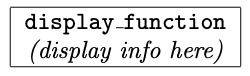


- functions that *only* ask for user input (and return it)

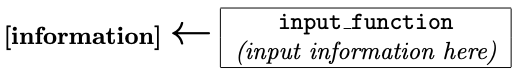

- functions that *only* calculate information, but display *nothing* (and
return the result)

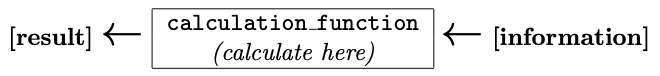

For example, the $\sin$ function would be written like:

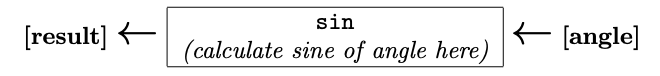


Let's rewrite the `interest` program from earlier, in terms of
functions. Looking at the code above, we have a couple of parts which
input a positive number from the user, and something which calculates
the principal given the original princial, rate, and year. A couple of
useful functions would then be:

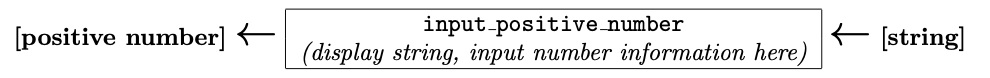

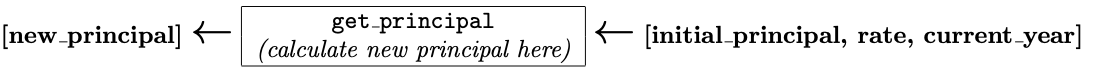


In Python these functions look like

In [6]:

def input_positive_number(prompt):
  
    y=-1
    while y<0:
        y=input(prompt)
        y=float(y)
        if y<0:
            print('This value cannot be negative.  Please reenter it.')
            
    return y
def get_principal(principal_orig,rate,year):

    principal_final=principal_orig*(1.0+rate)**year;
  
    return principal_final

#--------------------------------------

principal=input_positive_number('What is the initial principal? ')
rate=input_positive_number('What is the annual interest rate? ')

if rate:
    print('Converting percentage rate to decimal rate')
    rate=rate/100.0

number_of_years=input_positive_number('How many years do you want to calculate interest? ')
number_of_years=int(number_of_years)


print('The original principal is $',principal)
print('The interest rate is ',rate)

for current_year in range(1,number_of_years+1):

    new_principal=get_principal(principal,rate,current_year)
  
    print('After year ',current_year,': ')
    print('  The interest is $',new_principal-principal)
    print('  And the new principal is $',new_principal)


What is the initial principal?  100
What is the annual interest rate?  .3


Converting percentage rate to decimal rate


How many years do you want to calculate interest?  6


The original principal is $ 100.0
The interest rate is  0.003
After year  1 : 
  The interest is $ 0.29999999999998295
  And the new principal is $ 100.29999999999998
After year  2 : 
  The interest is $ 0.6008999999999673
  And the new principal is $ 100.60089999999997
After year  3 : 
  The interest is $ 0.9027026999999634
  And the new principal is $ 100.90270269999996
After year  4 : 
  The interest is $ 1.2054108080999555
  And the new principal is $ 101.20541080809996
After year  5 : 
  The interest is $ 1.509027040524245
  And the new principal is $ 101.50902704052424
After year  6 : 
  The interest is $ 1.813554121645808
  And the new principal is $ 101.81355412164581


Let's step through `input_positive_number` function to see what is going
on. In the main code there is a line

```python
    principal=input_positive_number('What is the initial principal? ')
```

This line calls the function `input_positive_number`, and gets to the
first line of that function which is:

```python
    def input_positive_number(prompt):
```
This says "assign the value of `’What is the initial principal? ’` to
the variable `prompt`" The variable `prompt` is *local* to this
function, which means that it cannot be seen from the outside, and will
not conflict with any other variable called `prompt` in any other
function or script. For example, if I had done:

```python
    prompt='hello'
    principal=input_positive_number('What is the initial principal? ')
    print(prompt)
```
then the displayed string would be `hello`, because this script doesn't
see the internal `prompt` variable in the `input_positive_number` function.

In a function, the *order* of the input arguments is what assigns data
to a variable, not the variable names themselves. Variable names are not
absolute in this case. For example, the following code...

In [7]:
def fun1(x,y):

    print("In fun1:")
    print("  x is ",x)
    print("  y is ",y)
    
def fun2(y,x):
    
    print("In fun2:")
    print("  x is ",x)
    print("  y is ",y)
    
    

a=5
b='hello'

fun1(a,b)
fun2(a,b)

In fun1:
  x is  5
  y is  hello
In fun2:
  x is  hello
  y is  5


### Input and Output Arguments versus `input` and `print` Commands

Beginning programmers often get confused about the difference between
*displaying* a result and *returning* a result. For example, look at the
following two functions:

In [8]:
def squared_print(x):
    y=x*x
    print(y)

def squared_return(x):
    y=x*x
    return y

In the first case, `squared_print`, the result of the square is displayed
on the screen. The caller of the function might run it like

    >>> squared_print(3)

and "9" is displayed on the screen. Then what? That's pretty much the
extent of the usefulness of this function (which is not particularly
useful).

The second case, `squared_return`, assigns the variable, `y`, to the value of
`x*x`, and returns it. From there, the caller of the function can choose
to display it, or not, or use it in a further calculation.

In [9]:
squared_print(3)

9


In [10]:
squared_return(3)

9

In [11]:
z=squared_return(3)
z+5

14

In [12]:
a=9
b=12
c=sqrt(squared_return(a)+squared_return(b))
c

15.0

Returned values are much more useful than displayed values.

As a side-note, what happens if I try the calculation with the `squared_print` function?  I get an error.

In [19]:
z=squared_print(3)
z+5

9


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [20]:
print(z)

None


so z is `None`, which isn't a number or anything.  When there is no `return` in a function, the function actually does return something -- it is called `None`.  Not particularly useful.

### More Turtle Examples

The easiest example of a use of a function is to bundle together a
number of commands into a convenient shortcut. Consider the following
example to draw a square. Here the function `square` draws a square of a
given size. When the command `square(100)` is done, then inside the
function the variable `size` is assigned to 100 and then used throughout
the rest of the function.

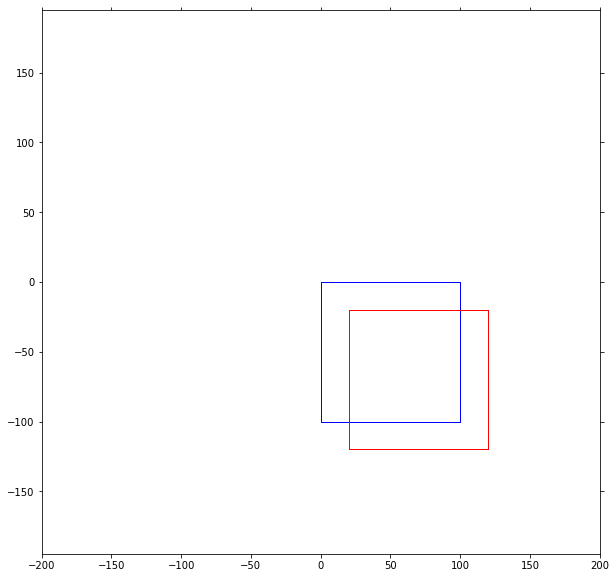

In [13]:
reset()

def square(size):
    for side in range(4):
        forward(size)
        right(90)
        
pencolor("blue")
square(100)

penup()
forward(20)
right(90)
forward(20)
left(90)
pendown()

pencolor("red")
square(100)


A more complex example is the following, which uses the function,
if-then structure, for-loop structure and random numbers to draw an
interesting, somewhat random, pattern. The function `randint` returns a
random number between the two numbers given. For example,
`randint(1,10)` returns a random number between 1 and 10 inclusive.
Notice how the alternating red/blue patterns is done. Calling
`pencolor()` with nothing inside returns the current color of the pen.
We check to see if the current color is blue, and if it is, we set it to
red. Otherwise we set it to blue.

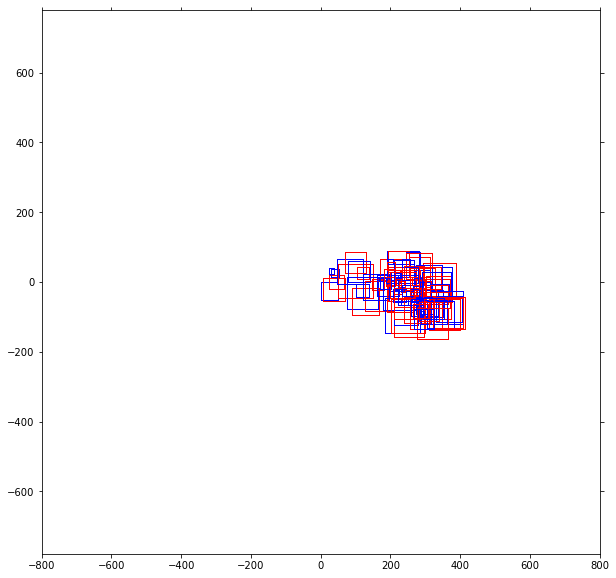

In [14]:
from random import randint

reset()

def square(sz):
    for side in range(4):
        forward(sz)
        right(90)
        
pencolor("blue")

for i in range(100):

    size=randint(10,100)
    square(size)
    
    move_over=randint(-30,30)
    move_up=randint(-30,30)
    
    penup()
    forward(move_over)
    right(90)
    forward(move_up)
    left(90)
    pendown()
    
    if pencolor()=='blue':
        pencolor('red')
    else:
        pencolor('blue')



> **Exercise**
> 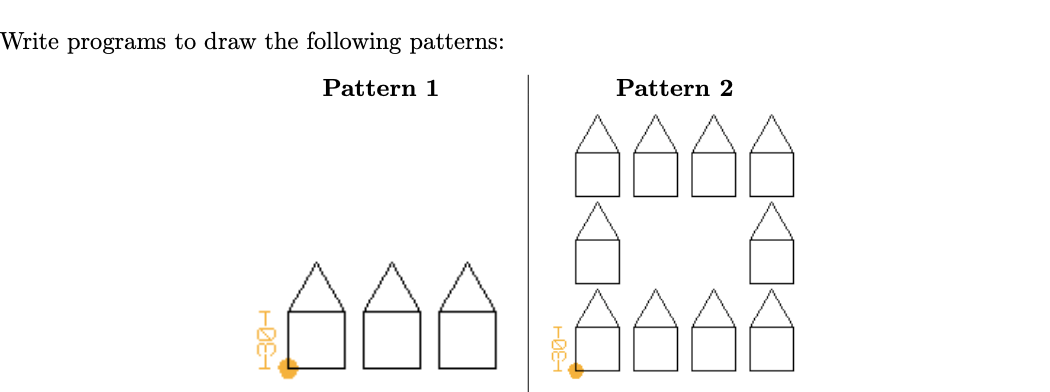

> **Exercise** 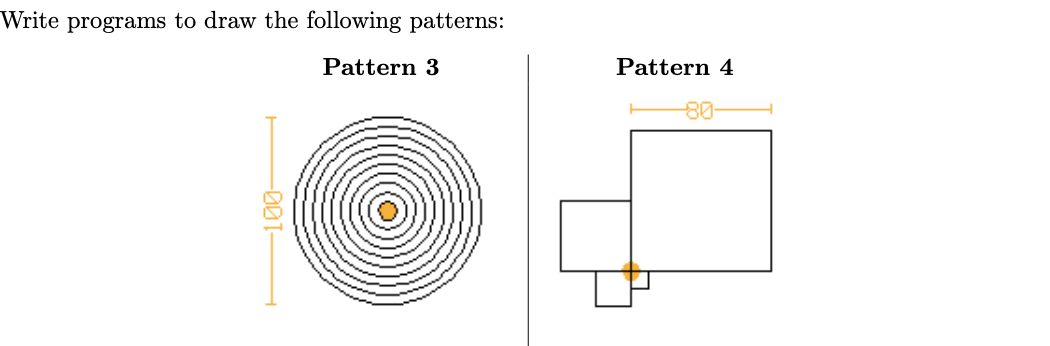

> **Exercise** 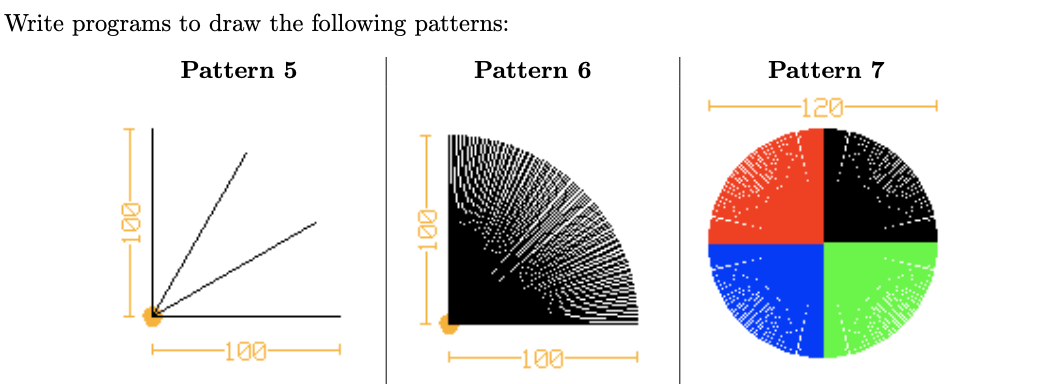

> **Exercise** 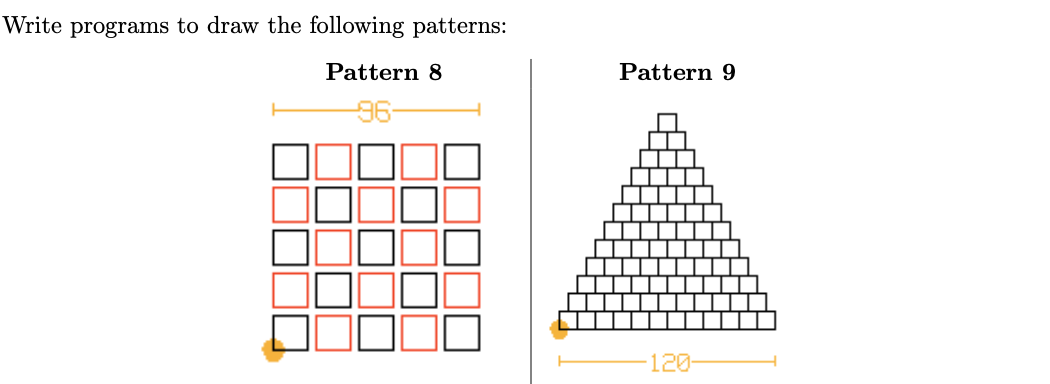

> **Exercise**  Make a function to draw a polygon. It should be given the number of sides, and the length of the
shape.  For example, if the number of sides is, say, 3 then it should draw a triangle. If it’s 4 then a square, 5 a pentagon, etc...


### Local Variables

Variables assigned within a function have no connection to any variables
outside of the function, even those of the same name. The variable is
considered *local* to the function, and is destroyed when the function
ends. The only way to pass information out of a function is through the
` return` statement.

Input arguments function just like local variables: changes in their
value do not affect anything outside of the function itself. Some
examples will help elucidate the properties of local variables. Consider
the following functions:

In [16]:
def localvars_second():
    
    a=10
    a=a+1
    
    print("second a is ",a)


def localvars_third(b):

    b=b+1
    a=2*b
    
    print("third a is ",a)


def localvars_fourth(c,e):

    print("beginning of fourth c is ",c)
    print("beginning of fourth e is ",e)

    a=c*c
    d=a+1
    d=d-2
    
    c=0
    e=-1
    
    
    print("fourth a is ",a)
    print("fourth c is ",c)
    print("fourth e is ",e)
    print("fourth d is ",d)

    return d


def localvars_first():

    a=5
    d=1
    
    localvars_second()
    print("first a is ",a)
    
    localvars_third(a)
    print("first a is ",a)
    
    y=localvars_fourth(a,2*a)
    print("first a is ",a)
    print("first d is ",d)
    print("first y is ",y)

In [17]:
localvars_first()

second a is  11
first a is  5
third a is  12
first a is  5
beginning of fourth c is  5
beginning of fourth e is  10
fourth a is  25
fourth c is  0
fourth e is  -1
fourth d is  24
first a is  5
first d is  1
first y is  24


The logic of the output is as follows. The function `localvars_first`
sets the value of `a` to be 5, and then the value of `d` to be 1. It
then calls `localvars_second`, which sets *its own* variable `a` to 10,
and then adds one to that, yielding 11. This does *not* affect the value
of `a` in `localvars_first`.

The function `localvars_first` then calls `localvars_third`, passing it
the value of `a`, which is still 5. This value is copied to the variable
`b` in `localvars_third`, because we called the first input argument
`b`. Now `b` will act like a local variable, and any changes to it will
not be seen outside of the `localvars_third` function. Again,
`localvars_third` sets *its own* variable `a`.

The function `localvars_first` then calls `localvars_fourth`, passing it
two values, one of which is the value of `a`, which is still 5, and the
other is the value of `2*a`, which is 10. These are copied to the
*local* variables in `localvars_fourth`, `c` and `e` respectively.
Changes to these variables, or local versions of `a`, do not affect the
value of `a` in `localvars_first`. The value of `d`, which is returned
from `localvars_fourth`, gets copied to `y` in ` localvars_first`.

### Some Useful Python Functions

In this section we summarize a few useful Python functions.


- `math.floor` and `math.ceil`: These functions take a real number and
return another real number, closest to an integer. `floor` drops
anything after the decimal, rounding down always. `ceil` rounds up
always.

In [18]:
import math
a=6.3425
b=2.786
math.floor(a)

6

In [19]:
math.ceil(a)

7

- `random.random`: This function returns a random number between 0 and 1,
not including 0 or 1.

In [20]:
import random
random.random()

0.9503297401425543

In [22]:
random.random()

0.6183851795278218

If you want to make a random number, say, from 1 to 10, then you can use
the `random.randint` function:

In [23]:
import random
random.randint(1,10)

9

In [24]:
random.randint(1,10)

6

In [25]:
random.randint(1,10)

9